# Tutorial : Building a custom OCR using YOLO and Tesseract
Karan Purohit. May 9, 2019.[Here](https://medium.com/saarthi-ai/how-to-build-your-own-ocr-a5bb91b622ba). [Code](https://github.com/008karan/PAN_OCR)

In this article, you will learn how to make your own custom OCR with the help of deep learning, to read text from an image. I will walk you through the example of PAN Card images, for text detection and text recognition.

## Overview
- What is OCR?
    - Text Detection
        - 1.1 Using YOLO (You only look once) for Text Detection
    - Text Recognition
    - Putting things together  
    
## Resources
- [Object Detection](https://towardsdatascience.com/object-detection-using-deep-learning-approaches-an-end-to-end-theoretical-perspective-4ca27eee8a9a)
- [Region-Based methods](https://medium.com/@jonathan_hui/understanding-region-based-fully-convolutional-networks-r-fcn-for-object-detection-828316f07c99)
- [Single-Shot methods](https://medium.com/@jonathan_hui/real-time-object-detection-with-yolo-yolov2-28b1b93e2088)
- [Comparison of various detectors](https://medium.com/@jonathan_hui/object-detection-speed-and-accuracy-comparison-faster-r-cnn-r-fcn-ssd-and-yolo-5425656ae359)

## What is OCR?
OCR stands for Optical Character Recognition. It is used to read text from images such as a scanned document or a picture. This technology is used to convert, virtually any kind of images containing written text (typed, handwritten or printed) into machine-readable text data.

OCR has two major building blocks:
- 1. Text Detection
- 2. Text Recognition

### 1. Text Detection
Our first task is to __detect the required text from images/documents__. Often, as the need is, you don’t want to read the entire document, rather just a piece of information like credit card number, Aadhaar/PAN card number, name, amount and date from bills, etc.

__Text detection__ or in general `object detection` has been an area of intensive research accelerated with deep learning. Today, object detection, and in our case, text detection, can be achieved through two approaches.

- In __Region-Based detectors__ (two-step process), the first objective is to `find all the regions which have the objects` and then `pass those regions to a classifier`, which gives us the locations of the required objects.

    This approach is considered __more accurate__ but is __comparatively slow__ as compared to the Single Shot approach. Algorithms like [Faster R-CNN](https://papers.nips.cc/paper/5638-faster-r-cnn-towards-real-time-object-detection-with-region-proposal-networks.pdf) and [R-FCN](https://arxiv.org/abs/1605.06409) take this approach.


- __Single Shot detectors__ (single step process), predict both the boundary box and the class at the same time. It is __much faster__. However, it must be noted that Single Shot detectors `perform badly while detecting smaller objects`. [SSD](https://arxiv.org/abs/1512.02325) and [YOLO](https://arxiv.org/abs/1506.02640) are Single Shot detectors.

__Reference__. Compares different detectors, and provides comprehensive insights on how they work.[Here](https://jonathan-hui.medium.com/object-detection-speed-and-accuracy-comparison-faster-r-cnn-r-fcn-ssd-and-yolo-5425656ae359)

#### 1.1 Using YOLO(You only look once) for Text Detection

YOLO is a state-of-the-art, real-time object detection network.

YOLO uses Darknet-53 as it’s feature extractor. It has overall 53 convolutional layers, hence the name ‘Darknet-53’. It has successive 3 × 3 and 1 × 1 convolutional layers and has some shortcut connections.

For the purpose of classification, independent logistic classifiers are used with the binary cross-entropy loss function.

##### Training YOLO using the Darknet framework

We will use the __Darknet Neural Network Framework__ for training and testing. The framework uses multi-scale training, lots of data augmentation and batch normalization. It is an open source neural network framework written in C and CUDA. It is fast, easy to install, and supports CPU and GPU computation.

You can find the source on [GitHub](https://github.com/pjreddie/darknet).  [tensorflow-yolov4](https://github.com/hhk7734/tensorflow-yolov4).


##### Get your data firt
Data is the first and most important thing in any machine learning based project. So, whatever is your application make sure you have around 100 images for it. 

If you have a fewer number of images, then use image augmentation to increase the size of your data. In __image augmentation__, we basically alter images by changing its size, orientation, light, color, etc.

There are many methods available for augmentation, and you can very easily pick any method you like. I would like to mention an image augmentation library called [Albumentations](https://github.com/albu/albumentations), build by Kaggle Masters and Grandmaster.

- [Albumentations documentation](https://albumentations.ai/docs/)

##### Data Annotation
Once we have collected the data, let’s move to the next step, which is to label it. There are many free data annotation tools available. I used [VoTT v1](https://github.com/Microsoft/VoTT/tree/v1) because it is a simple tool and works like a charm. Follow [this link](https://github.com/Microsoft/VoTT/tree/v1), to understand the process of data annotation.

Note that it is important we tag all the text fields that we want to read from the image data. It also generates the data folders which will be required during training.

Make sure to set export format to YOLO after tagging. After annotation, copy all the generated files to the data folder of the cloned repository.

##### Training
To start training our OCR, we first need to modify our config file. You will get your required config file in ‘cfg’ folder named ‘yolov3.cfg’. Here, you need to change the batch size, subdivision, number of classes and filter parameters. Follow the required changes needed in the config file, as given in the documentation.

### 2. Text Recognition
Now that we have our custom text detector implemented for text detection, we move onto the subsequent process of Text Recognition. You can either build your own text recognizer or use an open-sourced one.

Although, it is a great practice to implement your own text recognizer, it is challenging to get the labelled data for it. However, if you already have a lot of labelled data to create your custom text recognizer, it’ll certainly improve the accuracy.

#### Installing Tesseract OCR Engine
To get familiar with tesseract [here](https://www.pyimagesearch.com/2017/07/10/using-tesseract-ocr-python/) is a nice example.

### 3. Putting things together
Once we’ve implemented the process of text detection and text recognition, it is time to combine them to achieve the following flow:
- Detect the required region from the image
- Pass that detected regions to Tesseract
- Store the results from Tesseract in your required format

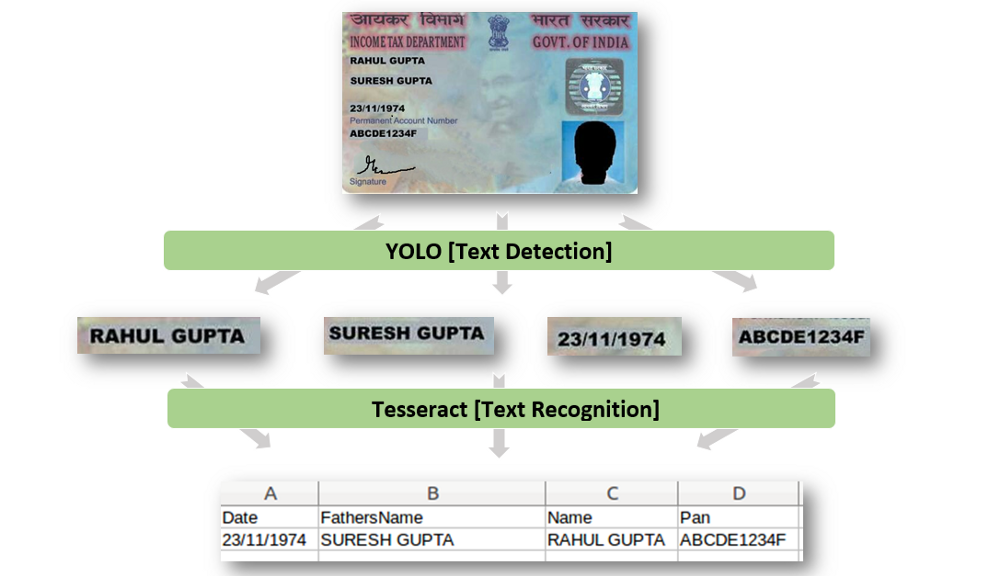

`From the above diagram, you can understand that, first the image of pan card is passed into YOLO. Then, YOLO detects the required text regions and crops them out from the image. Later, we pass those regions one by one to tesseract. Tesseract reads them, and we store that information`.